<a href="https://colab.research.google.com/github/lrsilsbee/Machine-Learning/blob/main/Lauren_Silsbee_Module_26_6_Time_Series_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Time Series Challenge

-In this analysis, I will plot the time series (along with any logical or necessary differences to get a stationary dataset)
generate and interpret a PACF for the time series (and/or its differences)
generate 5 ARIMA specifications and evaluate their efficacy at modeling the data
and choose one specification and make the case for that as a logical model for the dataset

I am going to use GDP from 1990-2020. This data is available on the [FRED's website](https://fred.stlouisfed.org/series/GDP).

In [ ]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#load dataset
from google.colab import files
files.upload()

Saving GDP.csv to GDP.csv


{'GDP.csv': b'DATE,GDP\n1990-01-01,5872.701\n1990-04-01,5960.028\n1990-07-01,6015.116\n1990-10-01,6004.733\n1991-01-01,6035.178\n1991-04-01,6126.862\n1991-07-01,6205.937\n1991-10-01,6264.54\n1992-01-01,6363.102\n1992-04-01,6470.763\n1992-07-01,6566.641\n1992-10-01,6680.803\n1993-01-01,6729.459\n1993-04-01,6808.939\n1993-07-01,6882.098\n1993-10-01,7013.738\n1994-01-01,7115.652\n1994-04-01,7246.931\n1994-07-01,7331.075\n1994-10-01,7455.288\n1995-01-01,7522.289\n1995-04-01,7580.997\n1995-07-01,7683.125\n1995-10-01,7772.586\n1996-01-01,7868.468\n1996-04-01,8032.84\n1996-07-01,8131.408\n1996-10-01,8259.771\n1997-01-01,8362.655\n1997-04-01,8518.825\n1997-07-01,8662.823\n1997-10-01,8765.907\n1998-01-01,8866.48\n1998-04-01,8969.699\n1998-07-01,9121.097\n1998-10-01,9293.991\n1999-01-01,9417.264\n1999-04-01,9524.152\n1999-07-01,9681.856\n1999-10-01,9899.378\n2000-01-01,10002.857\n2000-04-01,10247.679\n2000-07-01,10319.825\n2000-10-01,10439.025\n2001-01-01,10472.879\n2001-04-01,10597.822\n2001-07

In [ ]:
gdp_df = pd.read_csv(
    r'GDP.csv')

In [ ]:
gdp_df.head()

,DATE,GDP
0,1990-01-01,5872.701
1,1990-04-01,5960.028
2,1990-07-01,6015.116
3,1990-10-01,6004.733
4,1991-01-01,6035.178


In [ ]:
gdp_df.dtypes

DATE     object
GDP     float64
dtype: object

The feature GDPC is already numeric.

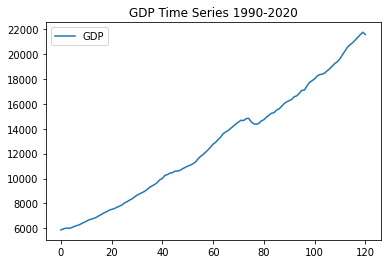

In [ ]:
#plot the series
gdp_df.plot()
plt.title('GDP Time Series 1990-2020')
plt.show()

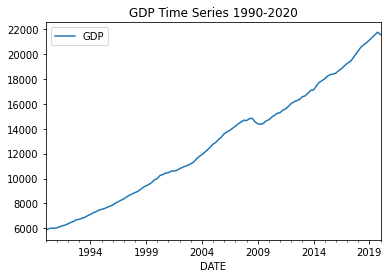

In [ ]:

#fix x axis to be more easily interpretable
gdp_df.index = pd.to_datetime(gdp_df.DATE)
gdp_df.plot()
plt.title('GDP Time Series 1990-2020')
plt.show()

There is certainly a trend to this series. I will need to apply differencing to make the series stationary so that I can fit ARIMA models.

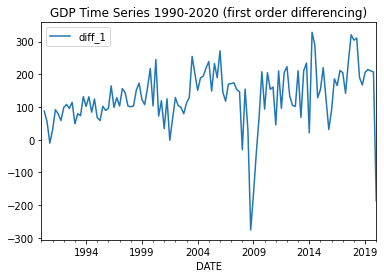

In [ ]:
gdp_df['diff_1'] = gdp_df.GDP - gdp_df.GDP.shift()
gdp_df.plot(y='diff_1')
plt.title('GDP Time Series 1990-2020 (first order differencing)')
plt.show()

The first order differencing seems to have mostly removed the trend. This should now meet the required assumptions of the ARIMA models. Now, I will generated the PACF and the first order differences.

Text(0.5, 1.0, 'GDP')

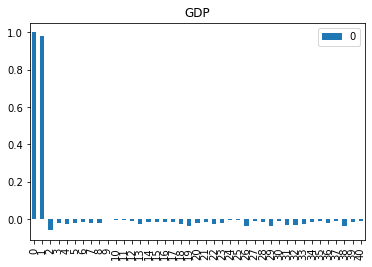

In [ ]:
x_acf = pd.DataFrame(pacf(gdp_df.GDP))
x_acf.plot(kind='bar')
plt.title("GDP")

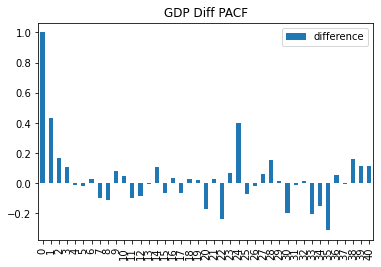

In [ ]:
x_acf = pd.DataFrame(pacf(gdp_df.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("GDP Diff PACF")
plt.legend(['difference'])

The initial series shows one strong correlation. The differences show 2 correlations. I will first build an ARIMA model with p set to 1 and I set to 2. I will then try models with different p, i, and q values to compare them.

**Model 1**

In [ ]:
model = ARIMA(gdp_df.GDP, order=(1,2,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                 D2.GDP   No. Observations:                  119
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -700.063
Method:                       css-mle   S.D. of innovations             86.774
Date:                Sat, 02 Jan 2021   AIC                           1406.126
Time:                        17:21:03   BIC                           1414.464
Sample:                    07-01-1990   HQIC                          1409.512
                         - 01-01-2020                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.3291      5.800     -0.229      0.819     -12.696      10.038
ar.L1.D2.GDP    -0.3754      0.093     -4.050      0.000      -0.557      -0.194
                                    Roots   

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


Model 1 has an AIC of 1406.126 and a log likelihood of -700.063. This is decent and these estimates are certainly better than the ones generated in the previous checkpoint. The log likelihood indicates the log of the likelihood that Model 1 would generate this data. The closer to zero, the higher the probablity we are to have predicted our outcome with our given model. A log-likelihood of -700 certainly is not very close to zero, but it could be worse. I will have to compare this AIC estimate to the other models below to see which is best.

**Model 2**

In [ ]:
model = ARIMA(gdp_df.GDP, order=(1,2,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                 D2.GDP   No. Observations:                  119
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -692.293
Method:                       css-mle   S.D. of innovations             80.029
Date:                Sat, 02 Jan 2021   AIC                           1392.585
Time:                        17:22:32   BIC                           1403.702
Sample:                    07-01-1990   HQIC                          1397.099
                         - 01-01-2020                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6711      0.366      1.834      0.069      -0.046       1.388
ar.L1.D2.GDP     0.4306      0.092      4.666      0.000       0.250       0.611
ma.L1.D2.GDP    -0.9999      0.024    -41.53

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


Model 2 (order = 1,2,1) has slightly better AIC (1392.585) and log-likelihood (-692.293) estimates in comparison to Model 1.

**Model 3**

In [ ]:
model = ARIMA(gdp_df.GDP, order=(1,2,2))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D2.GDP   No. Observations:                  119
Model:                 ARIMA(1, 2, 2)   Log Likelihood                -691.218
Method:                       css-mle   S.D. of innovations             79.435
Date:                Sat, 02 Jan 2021   AIC                           1392.437
Time:                        17:24:06   BIC                           1406.333
Sample:                    07-01-1990   HQIC                          1398.080
                         - 01-01-2020                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6276      0.445      1.410      0.161      -0.245       1.500
ar.L1.D2.GDP     0.6924      0.147      4.699      0.000       0.404       0.981
ma.L1.D2.GDP    -1.3252      0.188     -7.04

Model 3 (order = 1,2,2) has the smallest AIC (1392.437) and log-likelihood (-691.218) estimates thus far. So far, this is the winning model based on the AIC and log-likelihood estimates.

**Model 4**

In [ ]:
model = ARIMA(gdp_df.GDP, order=(2,2,2))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsato

                             ARIMA Model Results                              
Dep. Variable:                 D2.GDP   No. Observations:                  119
Model:                 ARIMA(2, 2, 2)   Log Likelihood                -691.415
Method:                       css-mle   S.D. of innovations             78.972
Date:                Sat, 02 Jan 2021   AIC                           1394.831
Time:                        17:25:16   BIC                           1411.506
Sample:                    07-01-1990   HQIC                          1401.602
                         - 01-01-2020                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6727      0.360      1.868      0.064      -0.033       1.379
ar.L1.D2.GDP    -0.5547        nan        nan        nan         nan         nan
ar.L2.D2.GDP     0.4453        nan        na

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


Model 4 (order = 2,2,2) has an AIC of 1394.831 and a log-likehood estimate of -691.415. The log-likelihoods of models 3 and 4 are nearly identical (and both are better than models 1 and 2), but the AIC is smaller in model 3. Model 3 is the best fit model thus far.

**Model 5**

In [ ]:
model = ARIMA(gdp_df.GDP, order=(0,1,2))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                  D.GDP   No. Observations:                  120
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -698.976
Method:                       css-mle   S.D. of innovations             81.868
Date:                Sat, 02 Jan 2021   AIC                           1405.953
Time:                        17:28:51   BIC                           1417.103
Sample:                    04-01-1990   HQIC                          1410.481
                         - 01-01-2020                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         129.0854     11.677     11.055      0.000     106.200     151.971
ma.L1.D.GDP     0.3857      0.102      3.791      0.000       0.186       0.585
ma.L2.D.GDP     0.1821      0.086      2.109    

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


Model 5 (order = 0,1,2) has a log-likelihood estimate of -698.976 and an AIC of 1405.953. Based on these metrics alone, Models 3 and 4 outperform Model 5 in terms of fitting this data.

Model 3 appears to be the most efficient at modeling this data. I want to compare the AIC estimates to make sure that this is the best decision.

In [ ]:
#Model 3 AIC compared to all other models' AIC estimates
from numpy import math
#compare to model 1
print(math.exp((1330.577-1345.386)/2))
#compare to model 2
print(math.exp((1330.577-1332.915)/2))
#compare to model 4
print(math.exp((1330.577-1332.148)/2))
#compare to model 5
print(math.exp((1330.577-1338.874)/2))

0.0006085083033657385
0.3106774634419672
0.45589169894022774
0.015788080853420927


The above estimates indicate that Model 3 significantly outperforms models 1 and 5. Model 3 is also a better fit to the data than Models 2 and 4, but the difference between Model 3 and Models 4 and 5 is not as large as the one between Model 3 and Models 1 and 5. This tells me that the PACF plots were very helpful in allowing me to pick the best p and I values (1 and 2), as the best performing model used these numbers. I was able to tweak the MA number in the various models, holding p and I constant in the first few models, to find that an MA of 2 is the best for this specific series. The most appropriate order is (1,2,2) for this series. In other words, this time series is best modeled with 1 autocorrelation term, 2 difference terms, and 2 moving average terms.

##Exploring Model 3

Let's check out the residuals from model 3 to make sure they are normally distributed and random.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'Histogram of Residuals')

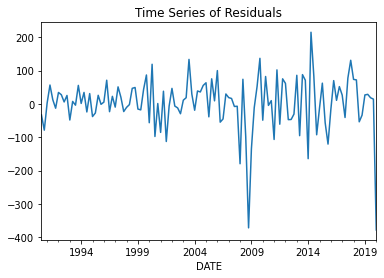

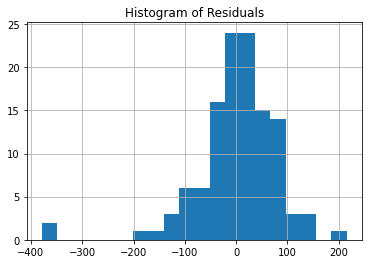

In [ ]:
model = ARIMA(gdp_df.GDP, order=(1,2,2))
model_fit = model.fit()

residuals = pd.DataFrame(model_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

There does not seem to be any clear trend based on the plot of the residuals, though there is some volatility. The histogram indicates that the residuals are close enough to the standard normal.

**Model 3 Interpretation**

In [ ]:
model = ARIMA(gdp_df.GDP, order=(1,2,2))
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D2.GDP   No. Observations:                  119
Model:                 ARIMA(1, 2, 2)   Log Likelihood                -691.218
Method:                       css-mle   S.D. of innovations             79.435
Date:                Sat, 02 Jan 2021   AIC                           1392.437
Time:                        17:31:40   BIC                           1406.333
Sample:                    07-01-1990   HQIC                          1398.080
                         - 01-01-2020                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6276      0.445      1.410      0.161      -0.245       1.500
ar.L1.D2.GDP     0.6924      0.147      4.699      0.000       0.404       0.981
ma.L1.D2.GDP    -1.3252      0.188     -7.04

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


The constant in Model 3 is 0.6276 . Then, each day is quite close to the previous day's value (as indicated by the AR1 coefficient being 0.6924).